In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('movies_prepr_featureExt.csv',sep=r',', skipinitialspace=True)
df.head(20)

,title,genres,original_language,popularity,production_companies,release_year,runtime,vote_average,vote_count,pc_impact,pcif,gif,pop_actor,success_pot
0,Meg 2: The Trench,Action,en,4.5,warner bros,2023,3.037037,7.079,4.417647,1.688612,high,high,True,medium
1,The Pope's Exorcist,Horror,en,4.5,screen gems,2023,2.074074,7.433,1.763823,0.644241,low,high,True,high
2,Transformers: Rise of the Beasts,Action,en,4.5,paramount,2023,3.851852,7.340,3.259026,1.516934,high,high,True,medium
3,Ant-Man and the Wasp: Quantumania,Action,en,4.5,marvel,2023,3.703704,6.507,9.097441,5.512888,very high,high,True,medium
4,Creed III,Drama,en,4.5,metro-goldwyn-mayer,2023,3.037037,7.262,3.653864,1.023453,medium,high,True,medium
5,Fast X,Action,en,4.5,universal,2023,4.962963,7.275,10.000000,1.566698,high,high,True,medium
6,Insidious: The Red Door,Horror,en,4.5,blumhouse,2023,2.370370,6.750,1.825314,0.452118,low,high,True,high
7,Plane,Action,en,4.5,di bonaventura,2023,2.370370,6.901,2.540552,2.337533,high,high,True,medium
8,Spider-Man: Across the Spider-Verse,multiple,en,4.5,columbia,2023,4.814815,8.640,5.450050,1.650344,high,low,True,medium
9,Aquaman and the Lost Kingdom,Action,en,4.5,warner bros,2023,3.629630,6.786,2.446697,1.688612,high,high,True,medium


**<h2>Encoding categorical features</h2>**

In [3]:
from sklearn.preprocessing import LabelEncoder
felabel = ['genres','original_language','production_companies']
le = LabelEncoder()
for feature in felabel:
    df[feature] = le.fit_transform(df[feature])

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal encoding mappings
pcif_mapping = ['low', 'medium', 'high', 'very high']
success_pot_mapping = ['low', 'medium', 'high']
gif_mapping = ['low', 'medium', 'high']
# Create the OrdinalEncoder and fit-transform the data
ordinal_encoder = OrdinalEncoder(categories=[pcif_mapping, success_pot_mapping,gif_mapping])
X_ordinal = ordinal_encoder.fit_transform(df[['pcif', 'success_pot','gif']])

# Update the original DataFrame with the encoded values
df['pcif'] = X_ordinal[:, 0]
df['success_pot'] = X_ordinal[:, 1]
df['gif'] = X_ordinal[:, 2]

In [5]:
from sklearn.preprocessing import LabelBinarizer

binary_encoder = LabelBinarizer()
df['pop_actor'] = binary_encoder.fit_transform(df['pop_actor'])

**<h2>Feature Selection</h2>**

<i>Before calculating feature selection parameters, we filter out certain features like 'title' and 'release year' which do not hold much significance as well as 'production_companies' which owing to its high cardinality which has been enconded, results in a bias in feature selection.<i>

<h3>1. Information Gain</h3>

Feature: vote_count Score: 0.15658432896019914
Feature: popularity Score: 0.11958653235931216
Feature: pc_impact Score: 0.10514736767486799
Feature: vote_average Score: 0.0917643165736477
Feature: pcif Score: 0.06215835081868626
Feature: pop_actor Score: 0.04981102218139544
Feature: genres Score: 0.0446547039208296
Feature: runtime Score: 0.04414294813237696
Feature: original_language Score: 0.03199301593448478
Feature: gif Score: 0.016299041805970305


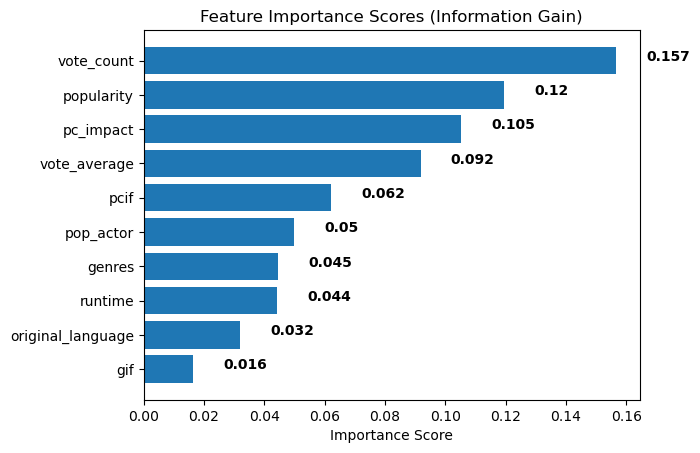

In [6]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
# Assuming 'target' is your target column
X = df.drop(['success_pot', 'title','production_companies','release_year'], axis=1)
y = df['success_pot']

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(X.shape[1]):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()


<h3>2. Chi-square test</h3>

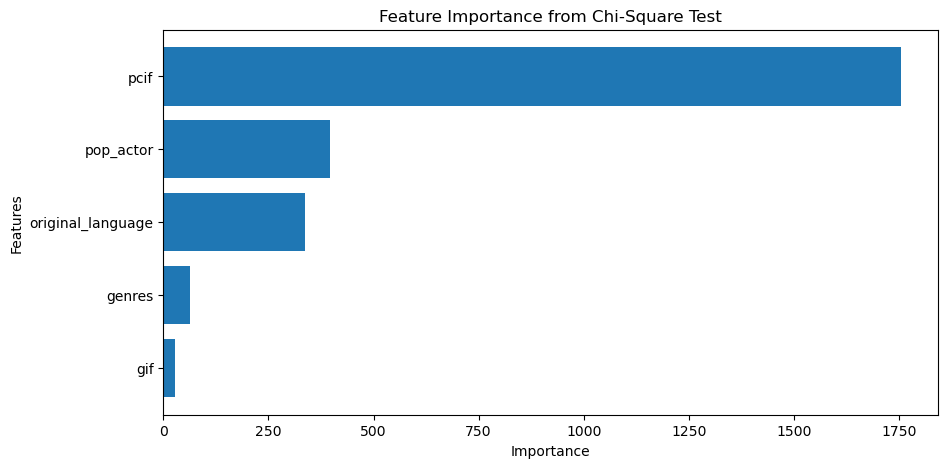

In [7]:
from sklearn.feature_selection import SelectKBest, chi2

# Assume X_encoded contains your one-hot encoded features and y is the target variable
X1 = df.drop(['success_pot', 'title','vote_count','popularity','pc_impact','vote_average','runtime','release_year','production_companies'], axis=1)
# Apply Chi-Square Test
chi2_scores, p_values = chi2(X1, y)

# Create a DataFrame of feature importance scores
feature_scores = pd.DataFrame({'feature': X1.columns, 'score': chi2_scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values('score', ascending=False)

# Plot the scores
plt.figure(figsize=(10, 5))
plt.barh(feature_scores['feature'], feature_scores['score'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Chi-Square Test')
plt.gca().invert_yaxis()
plt.show()

<h3>3. Fisher's score</h3>

/var/folders/_8/n7gm5dlx7tn_vjtzky_5rjjr0000gn/T/ipykernel_83371/3706969560.py:9: RuntimeWarning: divide by zero encountered in log10
  fisher_scores = -np.log10(selector.pvalues_)


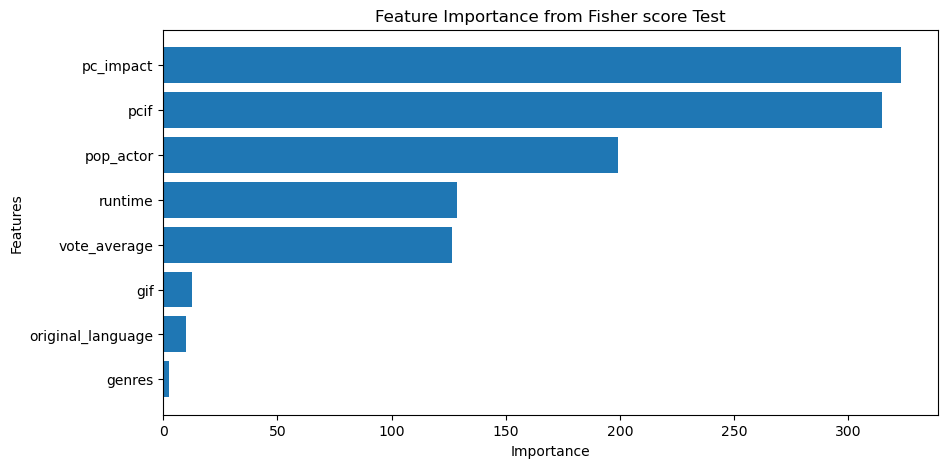

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply Fisher Score
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

# Get the scores
fisher_scores = -np.log10(selector.pvalues_)

# Create a DataFrame of feature importance scores
feature_scores = pd.DataFrame({'feature': X.columns, 'score': fisher_scores})

# Sort the DataFrame by scores in descending order
feature_scores = feature_scores.sort_values('score', ascending=False)
# Plot the scores
plt.figure(figsize=(10, 5))
plt.barh(feature_scores['feature'], feature_scores['score'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Fisher score Test')
plt.gca().invert_yaxis()
plt.show()

<h3>Trying Wrapper Feature Selection Methods</h3>

In [10]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


dt = DecisionTreeClassifier(random_state=42)

efs1 = EFS(dt, 
           min_features=1,
           max_features=X.shape[1],
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)


Features: 1023/1023

Best accuracy score: 0.62
Best subset (indices): (0, 7)
Best subset (corresponding names): ('genres', 'pcif')


Best accuracy score: 0.17
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Best subset (corresponding names): ('genres', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count', 'pc_impact', 'pcif', 'gif', 'pop_actor')


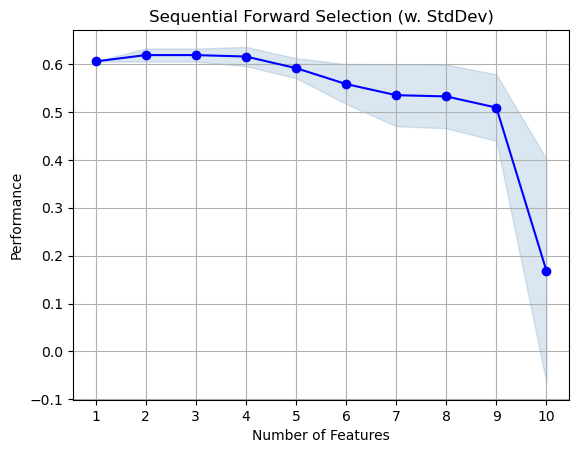

In [11]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


dt = DecisionTreeClassifier(random_state=42)

sfs = SFS(dt, 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


Best accuracy score: 0.61
Best subset (indices): (0,)
Best subset (corresponding names): ('genres',)


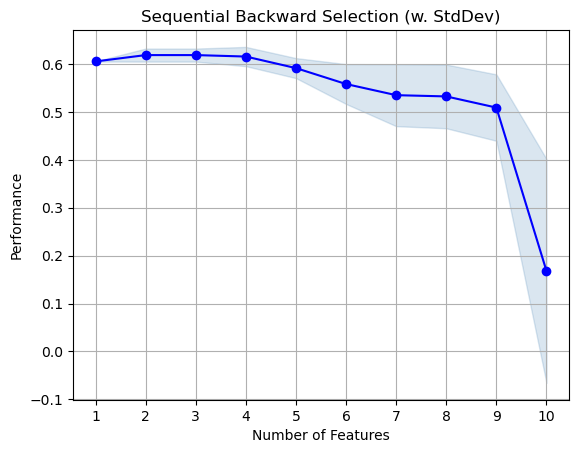

In [12]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


dt = DecisionTreeClassifier(random_state=42)

sfs = SFS(dt, 
           k_features=1, 
           forward=False, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()


Best accuracy score: 0.57
Best subset (indices): (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Best subset (corresponding names): ('genres', 'original_language', 'popularity', 'runtime', 'vote_average', 'vote_count', 'pc_impact', 'pcif', 'gif', 'pop_actor')


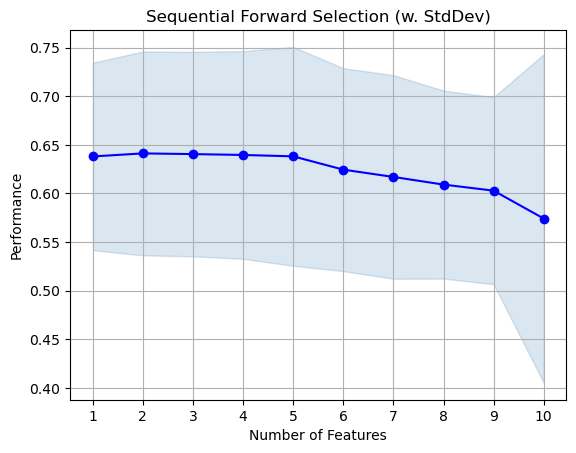

In [13]:
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs



gnb = GaussianNB()

sfs = SFS(gnb, 
           k_features=X.shape[1], 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()


Best accuracy score: 0.58
Best subset (indices): (0, 3, 4, 6, 7, 8, 9)
Best subset (corresponding names): ('genres', 'runtime', 'vote_average', 'pc_impact', 'pcif', 'gif', 'pop_actor')


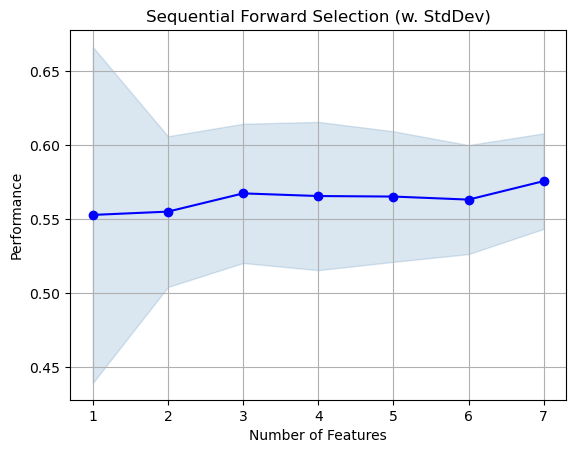

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

knn = KNeighborsClassifier(n_neighbors=3)

sfs = SFS(knn, 
           k_features=7, 
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

sfs = sfs.fit(X, y)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()
